In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import requests

In [102]:
url="https://raw.githubusercontent.com/AbisolaOlakanmi/Teamhousing/Datavisualization/Resources/Average%20Rents_Concat.csv"
url_requests=requests.get(url).content
avg_rent_df=pd.read_csv(io.StringIO(url_requests.decode('utf-8')))
avg_rent_df = avg_rent_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
avg_rent_df.head()

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
0,Nfld.Lab.,St. John's,St. John's East,St. John's East,Row,0.0,783.0,943.0,0.0,1166.0,2018
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,664.0,829.0,1049.0,1002.0,941.0,2018
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,743.0,0.0,576.0,2018
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,762.0,773.0,881.0,959.0,839.0,2018
4,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Row,0.0,0.0,0.0,0.0,0.0,2018


In [41]:
avg_rent_df = avg_rent_df[['Province','Year','Total']]

provinces_for_trend = ["Alta", "B.C.","Ont.","Que","Sask."]

avg_rent_df = avg_rent_df[(avg_rent_df['Province'].isin(provinces_for_trend))]

avg_rent_df = pd.pivot_table(avg_rent_df, index='Year', columns='Province', values='Total', aggfunc='mean', fill_value=0).reset_index()

avg_rent_df.columns = ["Year", "Alta", "B.C.", "Ont.","Que","Sask."]

avg_rent_df.head()

,Year,Alta,B.C.,Ont.,Que,Sask.
0,2018,710.186992,711.200000,625.719020,373.145729,573.959459
1,2019,726.524390,709.995238,655.959654,407.859296,564.000000
2,2020,722.577236,743.757143,667.935159,421.550251,545.608108
3,2021,723.711382,780.609524,667.131124,413.150754,573.148649
4,2022,752.804878,859.295238,702.646974,412.781407,636.418919


In [90]:
provinces_rentYoY = avg_rent_df.pct_change().dropna()
provinces_rentYoY = provinces_rentYoY[['Alta','B.C.','Ont.','Que','Sask.']]
provinces_rentYoY = provinces_rentYoY.transpose()
provinces_rentYoY.head()

,1,2,3,4
Alta,0.023004,-0.005433,0.001570,0.040200
B.C.,-0.001694,0.047552,0.049549,0.100800
Ont.,0.048329,0.018256,-0.001204,0.053237
Que,0.093030,0.033568,-0.019925,-0.000894
Sask.,-0.017352,-0.032610,0.050477,0.110391


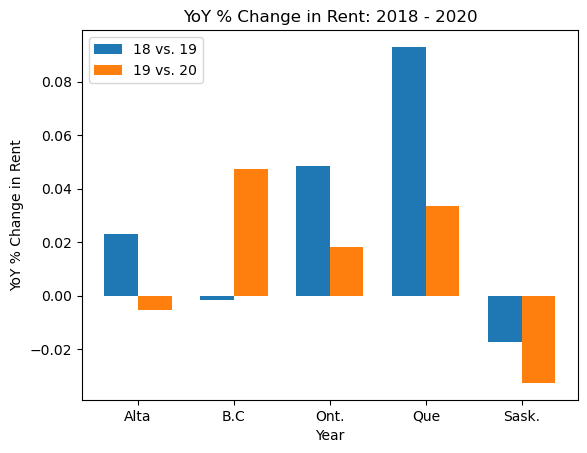

In [125]:
#plot Rent YoY:
provinces_rentYoY1820 = provinces_rentYoY[[1,2]]
index = np.arange(5)
bar_width = 0.35

fig, ax = plt.subplots()
yoy_1819 = ax.bar(index, provinces_rentYoY1820[1], bar_width, label="18 vs. 19")

yoy_1920 = ax.bar(index+bar_width, provinces_rentYoY1820[2], bar_width, label="19 vs. 20")

ax.set_xlabel('Year')
ax.set_ylabel('YoY % Change in Rent')
ax.set_title('YoY % Change in Rent: 2018 - 2020')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Alta", "B.C", "Ont.", "Que", "Sask."])
ax.legend(loc='upper left')

plt.show()

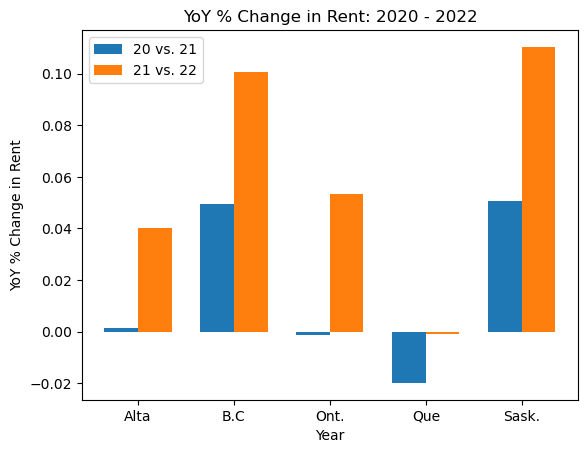

In [126]:
#plot Rent Trend:
provinces_rentYoY2022 = provinces_rentYoY[[3,4]]
index2 = np.arange(5)
bar_width2 = 0.35

fig, ax = plt.subplots()
yoy_2021 = ax.bar(index, provinces_rentYoY2022[3], bar_width, label="20 vs. 21")

yoy_2122 = ax.bar(index+bar_width, provinces_rentYoY2022[4], bar_width, label="21 vs. 22")

ax.set_xlabel('Year')
ax.set_ylabel('YoY % Change in Rent')
ax.set_title('YoY % Change in Rent: 2020 - 2022')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Alta", "B.C", "Ont.", "Que", "Sask."])
ax.legend(loc='upper left')

plt.show()

In [118]:
avg_rentDT_trend_df = avg_rent_df[['Province','Bachelor','1 Bedroom','2 Bedroom','3 Bedroom +','Year']]
avg_rentDT_trend_df = avg_rentDT_trend_df[(avg_rentDT_trend_df['Province']=='Alta') | 
                                          (avg_rentDT_trend_df['Province']=='B.C.') | 
                                          (avg_rentDT_trend_df['Province']=='Ont.') | 
                                          (avg_rentDT_trend_df['Province']=='Que') | 
                                          (avg_rentDT_trend_df['Province']=='Sask.')]
avg_rentDT_trend_df = pd.pivot_table(avg_rentDT_trend_df, index='Year', values=['Bachelor','1 Bedroom','2 Bedroom','3 Bedroom +'], aggfunc='mean', fill_value=0).reset_index()
avg_rentDT_trend_df.head()

,Year,1 Bedroom,2 Bedroom,3 Bedroom +,Bachelor
0,2018,407.483970,557.197287,433.710234,214.736745
1,2019,429.702219,585.530826,438.972256,215.954994
2,2020,445.581998,594.797781,438.832306,224.911221
3,2021,452.306412,608.847719,440.155364,227.789766
4,2022,489.092478,640.911221,491.467941,239.245993


In [119]:
dt_rentYoY = avg_rentDT_trend_df.pct_change().dropna()
dt_rentYoY = dt_rentYoY[['1 Bedroom','2 Bedroom','3 Bedroom +','Bachelor']]
dt_rentYoY = dt_rentYoY.transpose()
dt_rentYoY

,1,2,3,4
1 Bedroom,0.054525,0.036955,0.015091,0.081330
2 Bedroom,0.050850,0.015827,0.023621,0.052663
3 Bedroom +,0.012133,-0.000319,0.003015,0.116578
Bachelor,0.005673,0.041473,0.012799,0.050293


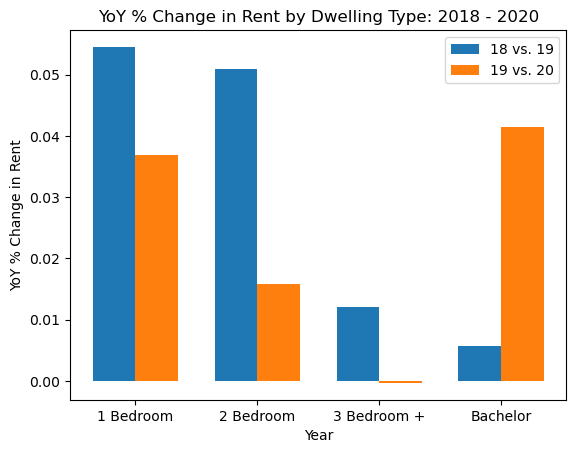

In [121]:
#plot Rent YoY:
dt_rentYoY1820 = dt_rentYoY[[1,2]]
index = np.arange(4)
bar_width = 0.35

fig, ax = plt.subplots()
yoyDT_1819 = ax.bar(index, dt_rentYoY1820[1], bar_width, label="18 vs. 19")

yoyDT_1920 = ax.bar(index+bar_width, dt_rentYoY1820[2], bar_width, label="19 vs. 20")

ax.set_xlabel('Year')
ax.set_ylabel('YoY % Change in Rent')
ax.set_title('YoY % Change in Rent by Dwelling Type: 2018 - 2020')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["1 Bedroom", "2 Bedroom", "3 Bedroom +", "Bachelor"])
ax.legend(loc='upper right')

plt.show()

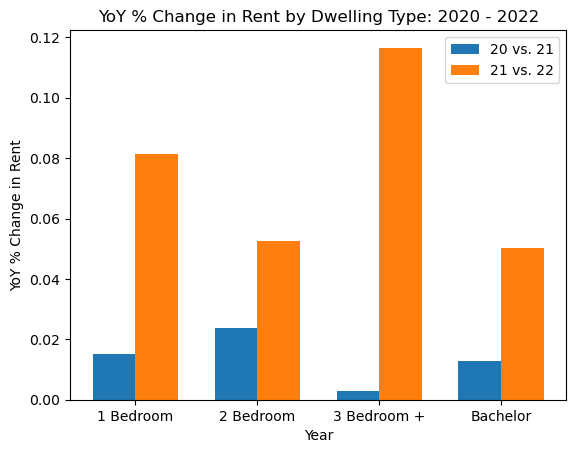

In [123]:
#plot Rent YoY:
dt_rentYoY2022 = dt_rentYoY[[3,4]]
index = np.arange(4)
bar_width = 0.35

fig, ax = plt.subplots()
yoyDT_2021 = ax.bar(index, dt_rentYoY2022[3], bar_width, label="20 vs. 21")

yoyDT_2122 = ax.bar(index+bar_width, dt_rentYoY2022[4], bar_width, label="21 vs. 22")

ax.set_xlabel('Year')
ax.set_ylabel('YoY % Change in Rent')
ax.set_title('YoY % Change in Rent by Dwelling Type: 2020 - 2022')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["1 Bedroom", "2 Bedroom", "3 Bedroom +", "Bachelor"])
ax.legend(loc='upper right')

plt.show()